## R-square

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

y = np.array([2,4,5,4,5])
y_hat = np.array([2.8,3.4,4,4.6,5.2])
r2_score(y, y_hat)

## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10
import warnings
warnings.filterwarnings('ignore')
np.random.seed(1)

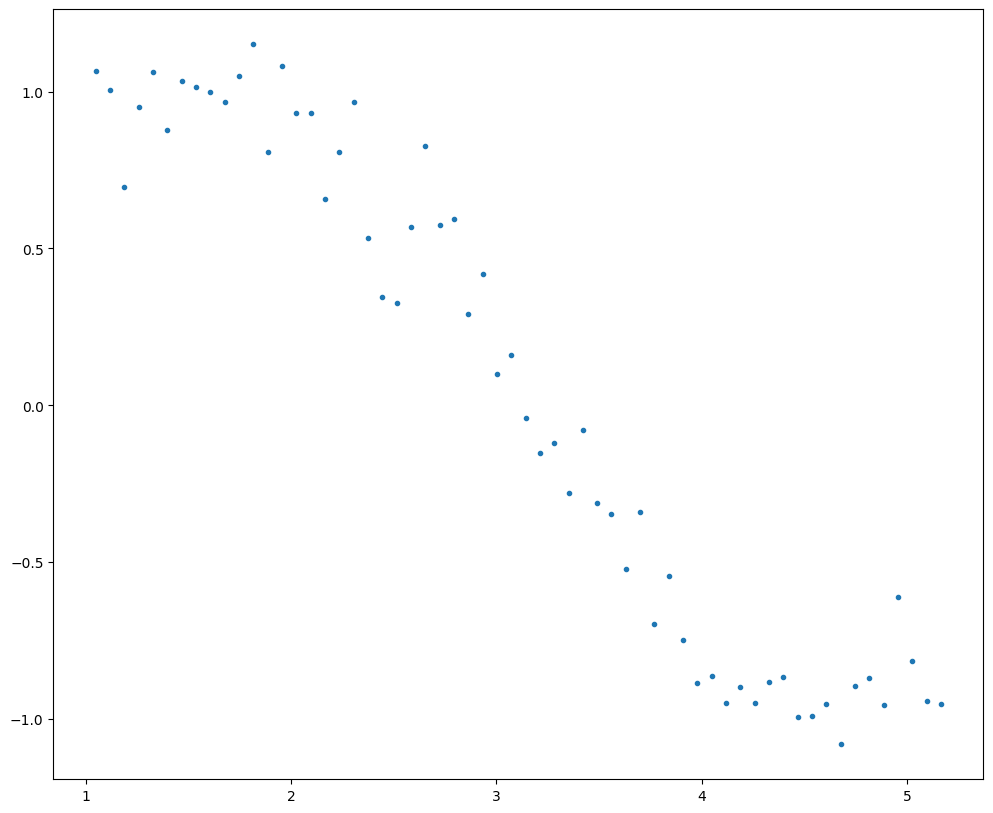

In [2]:
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [4]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

First, we’ll define a generic function which takes in the required maximum power of x as an input and returns a list containing – [ model RSS, intercept, coef_x, coef_x2, … upto entered power ]. Here RSS refers to ‘Residual Sum of Squares’ which is nothing but the sum of square of errors between the predicted and actual values in the training data set. The python code defining the function is:

In [7]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])

    #Fit the model
    linreg = LinearRegression()
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])

    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)

    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

Now, we can make all 15 models and compare the results. For ease of analysis, we’ll store all the results in a Pandas dataframe and plot 6 models to get an idea of the trend.

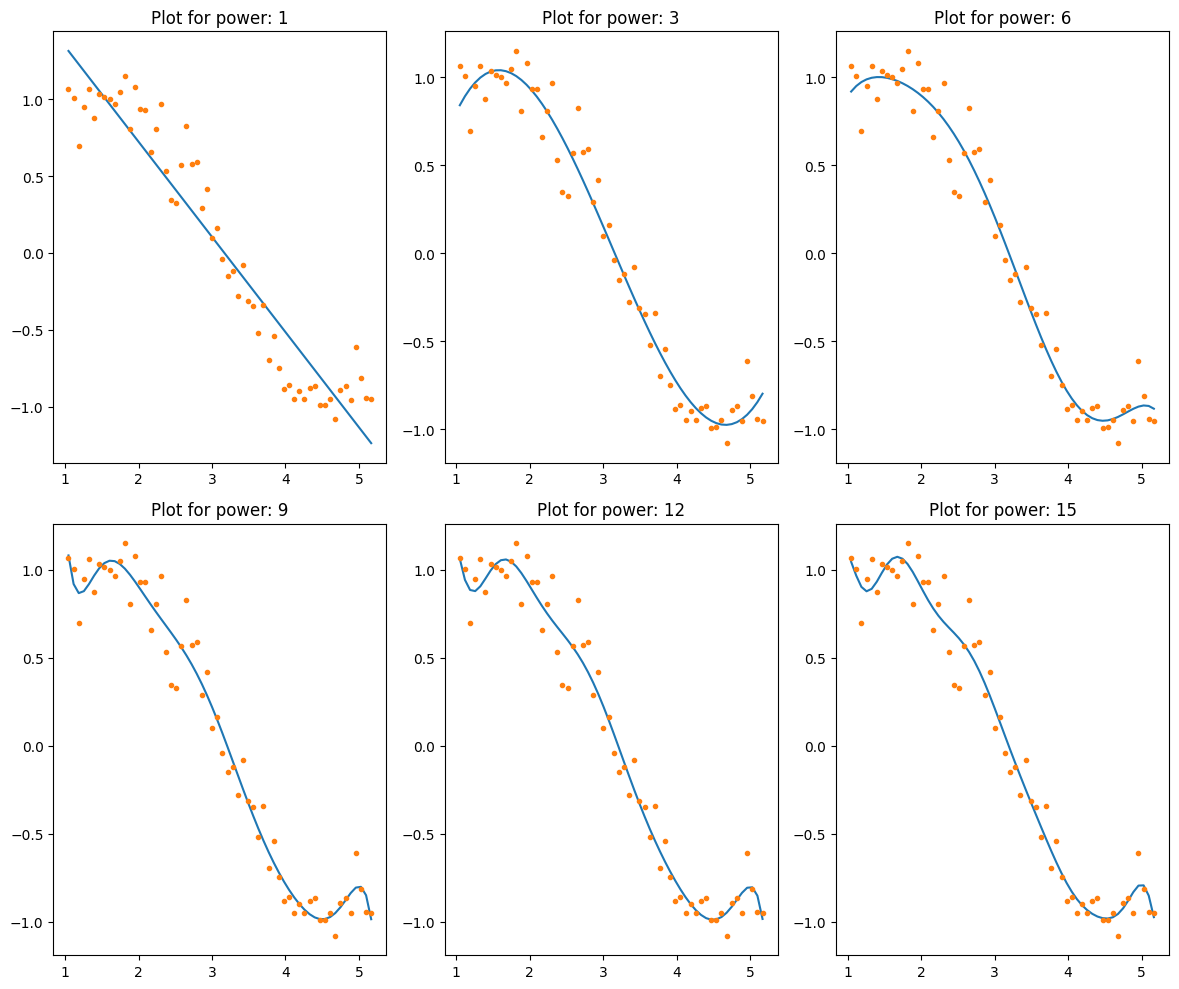

In [8]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [9]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


It is clearly evident that the size of coefficients increase exponentially with increase in model complexity. I hope this gives some intuition into why putting a constraint on the magnitude of coefficients can be a good idea to reduce model complexity.

## Ridge Penalty


Note that, Ridge penalty can be expressed like this,

$$ \beta(\alpha) = \arg\min_{\Theta} \frac{1}{2} \Vert Y - X \Theta \Vert^2 + \alpha \Vert \Theta \Vert^2 $$

First, lets define a generic function for ridge regression similar to the one defined for simple linear regression

In [12]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])

    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)

    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

So we need to make predictor. In this example, we assume that the sample data is from binomial distribution.

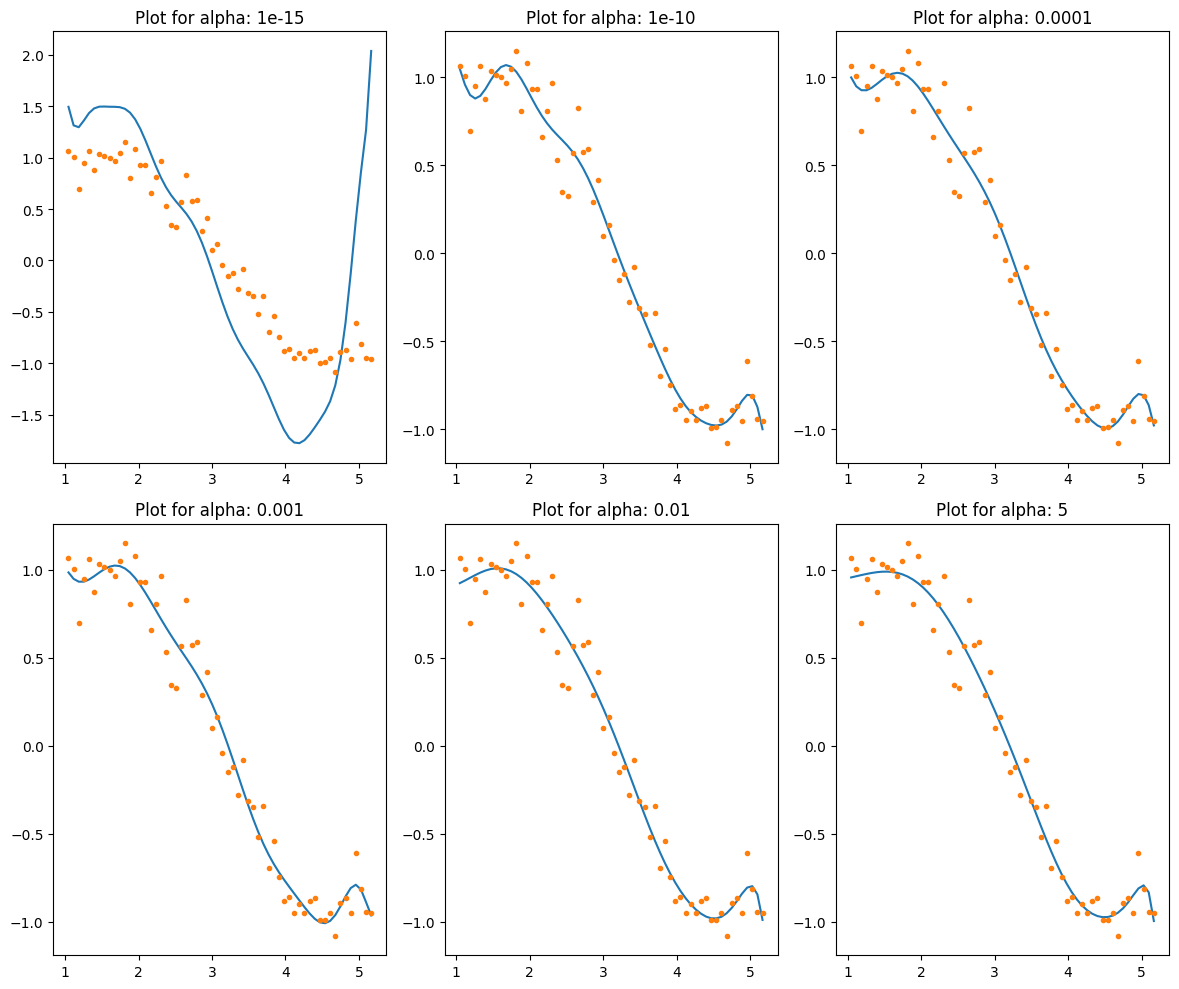

In [14]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

Here we can clearly observe that as the value of alpha increases, the model complexity reduces. Thus the hyper-parameter alpha should be chosen wisely.
Lets have a look at the value of coefficients in the above models:

In [15]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,33,-2.8e+04,1.9e+05,-5.9e+05,1.1e+06,-1.4e+06,1.3e+06,-8.4e+05,4.2e+05,-1.6e+05,4.6e+04,-1e+04,1.6e+03,-1.9e+02,15,-0.71,0.016
alpha_1e-10,0.85,75,-6.5e+02,2e+03,-2.8e+03,1.1e+03,2e+03,-3.8e+03,3.3e+03,-1.8e+03,6.9e+02,-1.9e+02,36,-4.8,0.43,-0.023,0.00055
alpha_1e-08,0.87,-5.8,65,-1.1e+02,-9.5,1.3e+02,-49,-1.2e+02,1.8e+02,-1.2e+02,49,-13,2.5,-0.32,0.026,-0.0013,2.6e-05
alpha_0.0001,0.89,6.3,-5.9,-3.3,2.2,4,0.019,-3.6,-0.14,3.4,-2.8,1.1,-0.28,0.044,-0.0042,0.00022,-5e-06
alpha_0.001,0.91,3.4,-1.8,-1.9,-0.5,1.5,2,-0.48,-3.8,4.1,-1.9,0.39,-0.0083,-0.015,0.0034,-0.00033,1.2e-05
alpha_0.01,0.93,1.1,-0.27,-0.18,0.11,0.3,0.13,-0.26,-0.22,0.4,-0.22,0.055,-0.0046,-0.0009,0.00028,-2.8e-05,1e-06
alpha_1,0.94,0.87,0.0072,0.018,0.027,0.027,0.012,-0.01,-0.02,-0.0024,0.017,-0.0082,0.00095,0.00034,-0.00013,1.6e-05,-7.3e-07
alpha_5,0.95,0.92,0.0036,0.0083,0.013,0.014,0.0095,-2.1e-05,-0.0087,-0.0072,0.0041,0.0051,-0.0049,0.0018,-0.00033,3.2e-05,-1.3e-06
alpha_10,0.95,0.93,0.0026,0.0061,0.0093,0.011,0.0078,0.00065,-0.0067,-0.0065,0.003,0.0047,-0.0042,0.0015,-0.00028,2.7e-05,-1e-06
alpha_20,0.95,0.95,0.0017,0.0041,0.0064,0.0075,0.006,0.0013,-0.0044,-0.0056,0.00087,0.0054,-0.0041,0.0014,-0.00025,2.4e-05,-9.1e-07


This straight away gives us the following inferences:



*   The RSS increases with increase in alpha, this model complexity reduces
*   A alpha as small as 1e-15 gives us significant reduction in magnitude of coefficients. How? Compare the coefficients in the first row of this table to the last row of simple linear regression table.
*   High alpha values can hurt the fitting. Note the rapid increase in RSS for values of alpha greater than 1
*   Though the coefficients are very very small, they are NOT zero.


## Lasso Regression

Unlike Ridge, Lasso uses absolute beta for the penalty.

$$ \beta(\alpha) = \arg\min_{\Theta} \frac{1}{2} \Vert Y - X \Theta \Vert^2 + \alpha \vert \Theta \vert $$

We hope to see that, when the $\alpha$ is increased, $\Theta$ is closed to 0, which means the **'shrinkage'** of the $\Theta$.

First we’ll define a generic function:

In [18]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha, max_iter=1000)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])

    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)

    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

Notice the additional parameters defined in Lasso function – ‘max_iter‘. This is the maximum number of iterations for which we want the model to run if it doesn’t converge before. This exists for Ridge as as well but setting this to a higher than default value was required in this case. Why? I’ll come to this in next section, just keep it in the back of the envelope. Lets check the output for 10 different values of $\alpha$ using the following code:

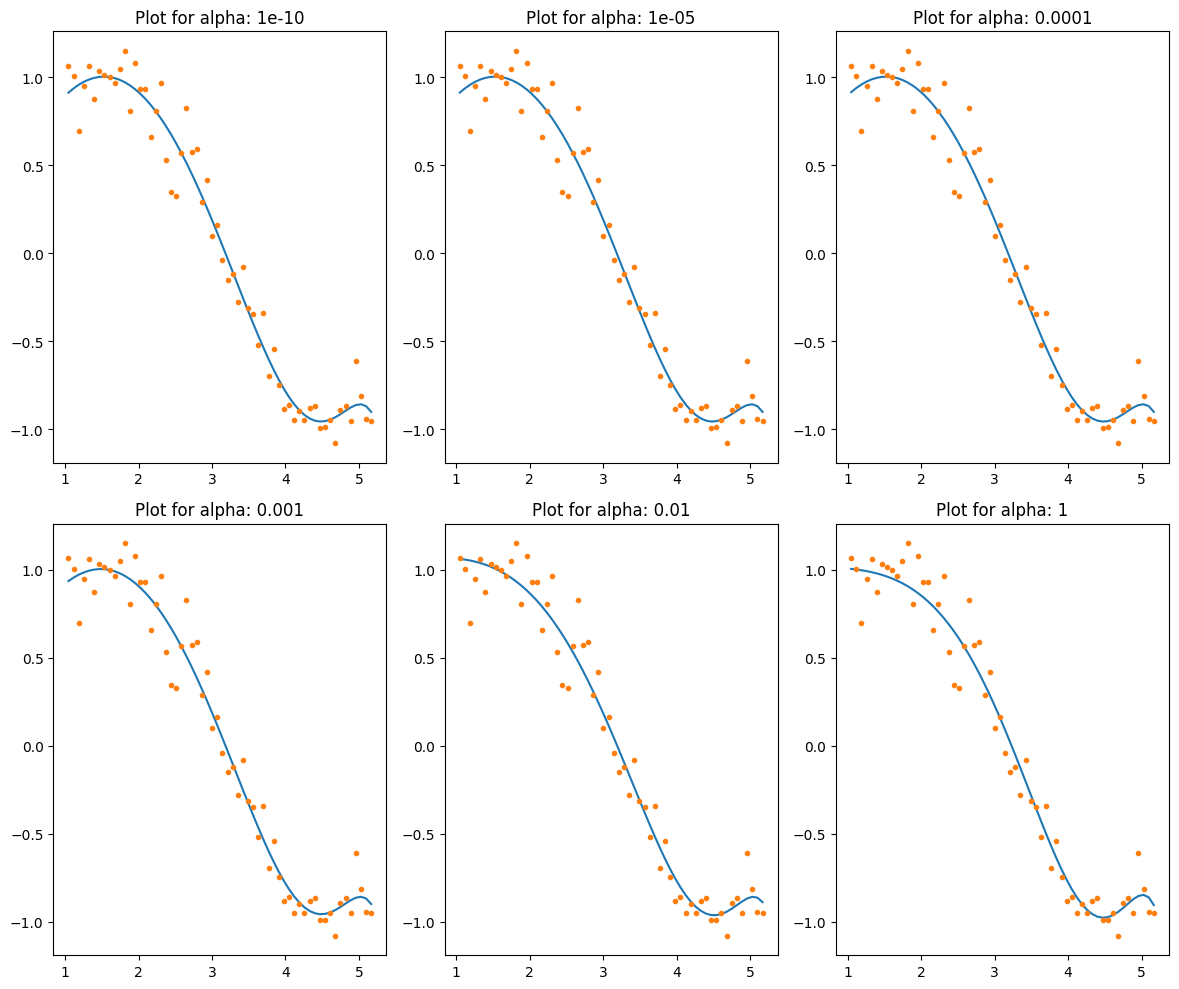

In [19]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

This again tells us that the model complexity decreases with increase in the values of $\lambda$.

In [20]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.97,0.14,1.1,-0.3,-0.024,-0.00052,0.0003,8.8e-05,1.7e-05,2.9e-06,4.1e-07,4.7e-08,2.9e-09,-5.3e-10,-3e-10,-9e-11,-2.3e-11
alpha_1e-10,0.97,0.14,1.1,-0.3,-0.024,-0.00052,0.0003,8.8e-05,1.7e-05,2.9e-06,4.1e-07,4.7e-08,2.9e-09,-5.3e-10,-3e-10,-9e-11,-2.3e-11
alpha_1e-08,0.97,0.14,1.1,-0.3,-0.024,-0.00052,0.0003,8.8e-05,1.7e-05,2.9e-06,4.1e-07,4.7e-08,2.9e-09,-5.3e-10,-3e-10,-9e-11,-2.3e-11
alpha_1e-05,0.97,0.14,1.1,-0.3,-0.024,-0.00052,0.0003,8.8e-05,1.7e-05,2.9e-06,4.1e-07,4.7e-08,3e-09,-5.3e-10,-3e-10,-9e-11,-2.3e-11
alpha_0.0001,0.97,0.15,1.1,-0.3,-0.024,-0.00056,0.0003,8.8e-05,1.7e-05,2.9e-06,4.1e-07,4.7e-08,3e-09,-5.3e-10,-3e-10,-9e-11,-2.3e-11
alpha_0.001,0.97,0.29,0.9,-0.23,-0.03,-0.0009,0.00029,9e-05,1.8e-05,3e-06,4.2e-07,4.9e-08,3.2e-09,-5.2e-10,-3e-10,-9.2e-11,-2.3e-11
alpha_0.01,1,1.1,0,0.055,-0.045,-0.0043,0.0001,9.8e-05,2.1e-05,3.7e-06,5.4e-07,6.5e-08,4.9e-09,-4.3e-10,-3.2e-10,-1e-10,-2.6e-11
alpha_1,1,1,-0,-0,-0,-0.0074,-0.002,0.00014,5.5e-05,6.8e-06,8e-07,7.8e-08,3.4e-09,-1.2e-09,-5e-10,-1.4e-10,-3.4e-11
alpha_5,1.1,0.95,-0,-0,-0,-0,-0.0034,-0.0002,7.5e-05,1.4e-05,1.5e-06,1.4e-07,6.8e-09,-1.7e-09,-7.5e-10,-2.1e-10,-4.9e-11
alpha_10,1.4,0.89,-0,-0,-0,-0,-0.0016,-0.00065,4.3e-05,2e-05,2.1e-06,2.1e-07,1.3e-08,-1.3e-09,-8.2e-10,-2.4e-10,-5.8e-11


Apart from the expected inference of higher RSS for higher alphas, we can see the following:

For the same values of alpha, the coefficients of lasso regression are much

*   For the same values of alpha, the coefficients of lasso regression are much smaller as compared to that of ridge regression (compare row 1 of the 2 tables).
*   For the same alpha, lasso has higher RSS (poorer fit) as compared to ridge regression

*   Many of the coefficients are zero even for very small values of alpha


